In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
BASE = '/kaggle/input/wave2hackathon/'
kabini = pd.read_csv(BASE + '/kabini.csv')
KRS = pd.read_csv(BASE + '/KRS.csv')
hemavathi = pd.read_csv(BASE + '/Hemavathi.csv', parse_dates=True, index_col = "FLOW_DATE")
harangi = pd.read_csv(BASE + '/Harangi.csv')



FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/wave2hackathon//kabini.csv'

In [ ]:
## 
hemavathi.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
FLOW_DATE,,,,,,,,,
2011-01-01,44,Hemavathi,2011,1,31.60,2916.07,981,2001.0,HEMAVATHI-2011-01-01
2011-01-02,45,Hemavathi,2011,1,31.50,2915.95,849,1950.0,HEMAVATHI-2011-01-02
2011-01-03,46,Hemavathi,2011,1,31.39,2915.82,782,1950.0,HEMAVATHI-2011-01-03
2011-01-04,47,Hemavathi,2011,1,31.34,2915.77,695,1075.0,HEMAVATHI-2011-01-04
2011-01-05,48,Hemavathi,2011,1,31.34,2915.77,661,550.0,HEMAVATHI-2011-01-05


In [ ]:
df = hemavathi.drop(['RESERVOIR' ,'SL_NO', 'UNIQUE_KEY'], axis=1)

## PreProcessing //

In [ ]:
df['INFLOW_CUSECS'] = df['INFLOW_CUSECS'].replace(['&nbsp;'],'0.0')
df['INFLOW_CUSECS'] = df['INFLOW_CUSECS'].astype(float)
df['RES_LEVEL_FT'] = df['RES_LEVEL_FT'].replace(['&nbsp;'],'0.0')
df['RES_LEVEL_FT'] =df['RES_LEVEL_FT'].astype(float)

In [ ]:
columns = df.columns

In [ ]:
columns

Index(['YEAR', 'WEEK_NO', 'PRESENT_STORAGE_TMC', 'RES_LEVEL_FT',
       'INFLOW_CUSECS', 'OUTFLOW_CUECS'],
      dtype='object')

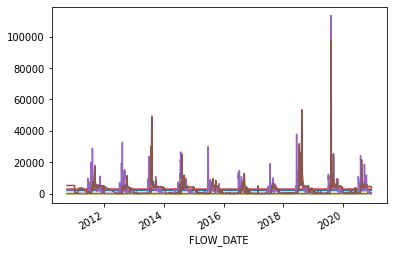

In [ ]:
for column in columns:
    df[column].plot()

# MODELs

## xgboost

## LSTM

## RNN

## ARIMA

## SARIMAX


#### Taking PRESENT_STORAGE_TMC as the target level for the reservoir



from :- https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/blob/master/Untitled.ipynb
ARIMA and Seasonal ARIMA
Autoregressive Integrated Moving Averages
The general process for ARIMA models is the following:

Visualize the Time Series Data
Make the time series data stationary
Plot the Correlation and AutoCorrelation Charts
Construct the ARIMA Model or Seasonal ARIMA based on the data
Use the model to make predictions

In [ ]:
df['PRESENT_STORAGE_TMC'].head()

FLOW_DATE
2011-01-01    31.60
2011-01-02    31.50
2011-01-03    31.39
2011-01-04    31.34
2011-01-05    31.34
Name: PRESENT_STORAGE_TMC, dtype: float64

In [ ]:
df.describe()

,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS
count,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000
mean,2015.732046,27.718769,16.509919,2888.602378,2527.419571,2509.093167
std,2.827683,14.922295,11.299499,54.378152,5540.150897,4120.933019
min,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,15.000000,6.400000,2870.030000,122.000000,200.000000
50%,2016.000000,28.000000,12.675000,2887.385000,532.500000,1000.000000
75%,2018.000000,41.000000,26.700000,2910.030000,2922.000000,4350.000000
max,2020.000000,52.000000,37.100000,2922.000000,113435.000000,97800.000000


In [ ]:
df.head()

,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS
FLOW_DATE,,,,,,
2011-01-01,2011,1,31.60,2916.07,981.0,2001.0
2011-01-02,2011,1,31.50,2915.95,849.0,1950.0
2011-01-03,2011,1,31.39,2915.82,782.0,1950.0
2011-01-04,2011,1,31.34,2915.77,695.0,1075.0
2011-01-05,2011,1,31.34,2915.77,661.0,550.0


In [ ]:

### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['PRESENT_STORAGE_TMC'])

In [ ]:
def adfuller_test(present_storage_TMC):
    result=adfuller(present_storage_TMC)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['PRESENT_STORAGE_TMC'])


ADF Test Statistic : -5.069611228743671
p-value : 1.6131608800439852e-05
#Lags Used : 23
Number of Observations Used : 3290
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


NameError: name 'plt' is not defined

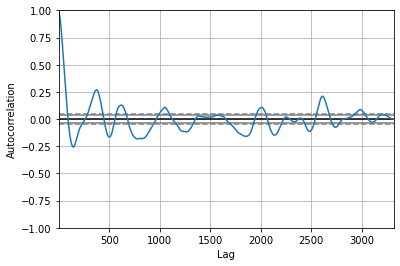

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['PRESENT_STORAGE_TMC'])
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:

model=ARIMA(df['PRESENT_STORAGE_TMC'],order=(1,1,1))
model_fit=model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [ ]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                               
=================================================================================
Dep. Variable:     D.PRESENT_STORAGE_TMC   No. Observations:                 3313
Model:                    ARIMA(1, 1, 1)   Log Likelihood               -5278.903
Method:                          css-mle   S.D. of innovations              1.191
Date:                   Wed, 19 May 2021   AIC                          10565.807
Time:                           10:18:49   BIC                          10590.229
Sample:                                1   HQIC                         10574.547
                                                                                 
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0036      0.017     -0.217      0.828      -0.036       0.029
ar.L1.D.PRESENT_STORAGE_TMC     0.1860      0.061      3.027      0.002       0.066       0.306
ma.L1.D.PRESENT_STORAGE_TMC    -0.3445      0.057     -6.019      0.000      -0.457      -0.232
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.3758           +0.0000j            5.3758            0.0000
MA.1            2.9031           +0.0000j            2.9031            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
df['forecast']=model_fit.predict(start=1000,end=2003,dynamic=True)
df[['PRESENT_STORAGE_TMC','forecast']].plot(figsize=(12,8))

ValueError: cannot reindex from a duplicate axis

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['PRESENT_STORAGE_TMC'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [ ]:
df['forecast']=results.predict(start=1000,end=2003,dynamic=True)
df[['PRESENT_STORAGE_TMC','forecast']].plot(figsize=(12,8))

ValueError: cannot reindex from a duplicate axis